In [2]:
from skimage import io
from skimage.filters import gaussian
from skimage.filters import laplace
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal


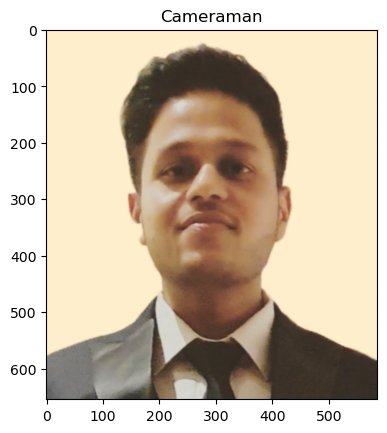

In [3]:
I = io.imread("photo.png")

%matplotlib inline
fig=plt.figure()
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title("Cameraman")
plt.show()

In [4]:
print(I.shape)

(655, 586, 4)


In [5]:
# Let's build a 2D Gaussian kernel
def gkern(std=3.0):
    """Returns a 2D Gaussian kernel array."""
    kernlen = np.cast['int'](2*np.round(3.0*std)+1)
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

# Let's show a Gaussian kernel
gker = gkern(1.0)

# Let's now apply this filter matrix to the Cameraman image
I = I.astype('float64')
h_image,w_image = I.shape
h_ker,w_ker = gker.shape
hf_ker = np.cast['int']((h_ker-1.)/2.)
wf_ker = np.cast['int']((w_ker-1.)/2.)

J = np.zeros_like(I)
for i in np.arange(hf_ker,h_image-hf_ker,1):
  for j in np.arange(wf_ker,w_image-wf_ker,1):
    for l in np.arange(-hf_ker,hf_ker+1,1):
      for m in np.arange(-wf_ker,wf_ker+1,1):
        J[i,j] += I[i+l,j+m]*gker[l+hf_ker,m+wf_ker]

%matplotlib inline
fig=plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(gker, cmap='gray')
plt.title("Gaussian kernel matrix")
plt.subplot(122)
plt.imshow(J, cmap='gray')
plt.title("Blurred Cameraman")
plt.show()


ValueError: too many values to unpack (expected 2)

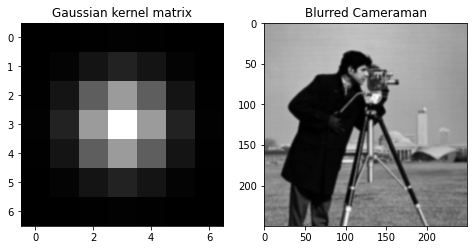

In [ ]:
# Let's extend the border of the image

from skimage.util import pad

I_padded = pad(array=I,pad_width=((hf_ker,hf_ker),(wf_ker,wf_ker)),mode="symmetric")
h_pad_image,w_pad_image = I.shape

J = np.zeros_like(I_padded)
for i in np.arange(hf_ker,h_pad_image-hf_ker,1):
  for j in np.arange(wf_ker,w_pad_image-wf_ker,1):
    for l in np.arange(-hf_ker,hf_ker+1,1):
      for m in np.arange(-wf_ker,wf_ker+1,1):
        J[i,j] += I[i+l,j+m]*gker[l+hf_ker,m+wf_ker]

J = J[hf_ker:h_pad_image-hf_ker,wf_ker:w_pad_image-wf_ker]

%matplotlib inline
fig=plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(gker, cmap='gray')
plt.title("Gaussian kernel matrix")
plt.subplot(122)
plt.imshow(J, cmap='gray')
plt.title("Blurred Cameraman")
plt.show()


0.7291646320469455 0.03866236327647539


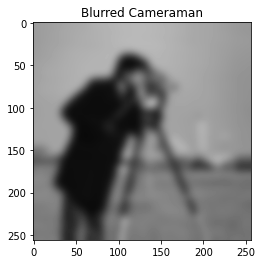

In [ ]:
J = gaussian(I, sigma=5, mode='reflect')
print(np.amax(J),np.amin(J))
%matplotlib inline
fig=plt.figure()
plt.imshow((255*J).astype(int), cmap='gray', vmin=0, vmax=255)
plt.title("Blurred Cameraman")
plt.show()

-2.129411764705882 1.9215686274509807


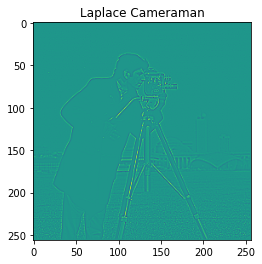

In [ ]:
K = laplace(I, ksize=5)
print(np.amin(K),np.amax(K))
%matplotlib inline
fig=plt.figure()
plt.imshow(K)
plt.title("Laplace Cameraman")
plt.show()

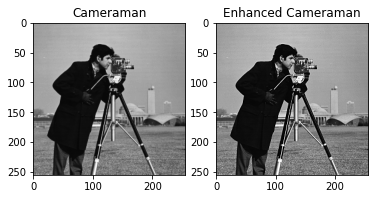

In [ ]:
%matplotlib inline
plt.subplot(121)
plt.imshow((I).astype(int), cmap='gray', vmin=0, vmax=255)
plt.title("Cameraman")
plt.subplot(122)
plt.imshow((I+50*K).astype(int), cmap='gray', vmin=0, vmax=255)
plt.title("Enhanced Cameraman")
plt.show()

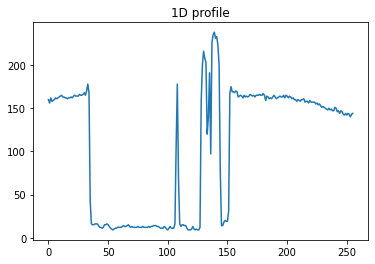

In [ ]:
%matplotlib inline
fig=plt.figure()
plt.plot(I[100,:])
plt.title("1D profile")
plt.show()

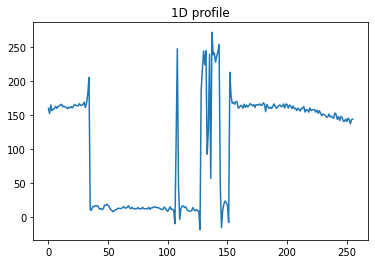

In [ ]:
%matplotlib inline
fig=plt.figure()
plt.plot((I+50*K)[100,:])
plt.title("1D profile")
plt.show()